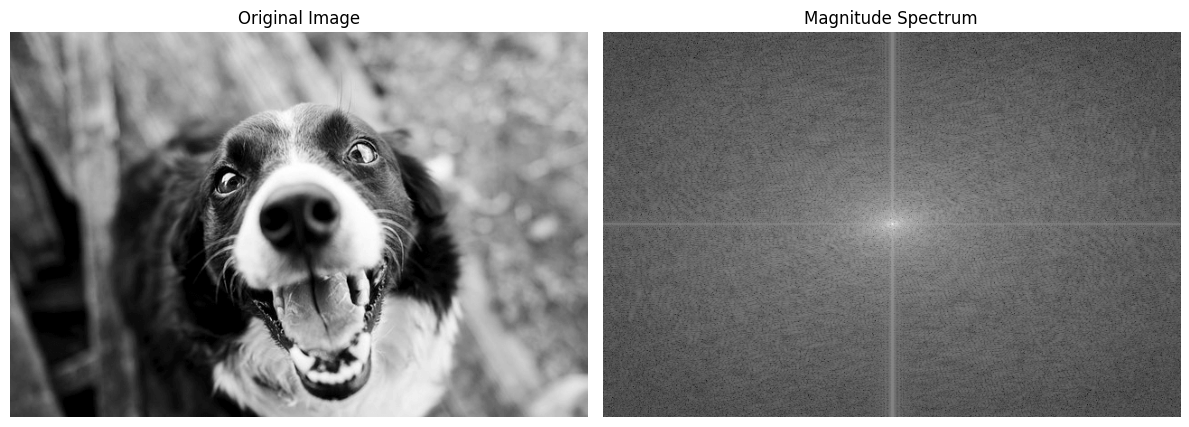

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/dogo.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found! Please check the path.")
else:
    # Compute the Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))  # Magnitude spectrum (logarithmic scale)

    # Display the original image and its magnitude spectrum
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Fourier Transform (Magnitude Spectrum)
    plt.subplot(1, 2, 2)
    plt.title("Magnitude Spectrum")
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


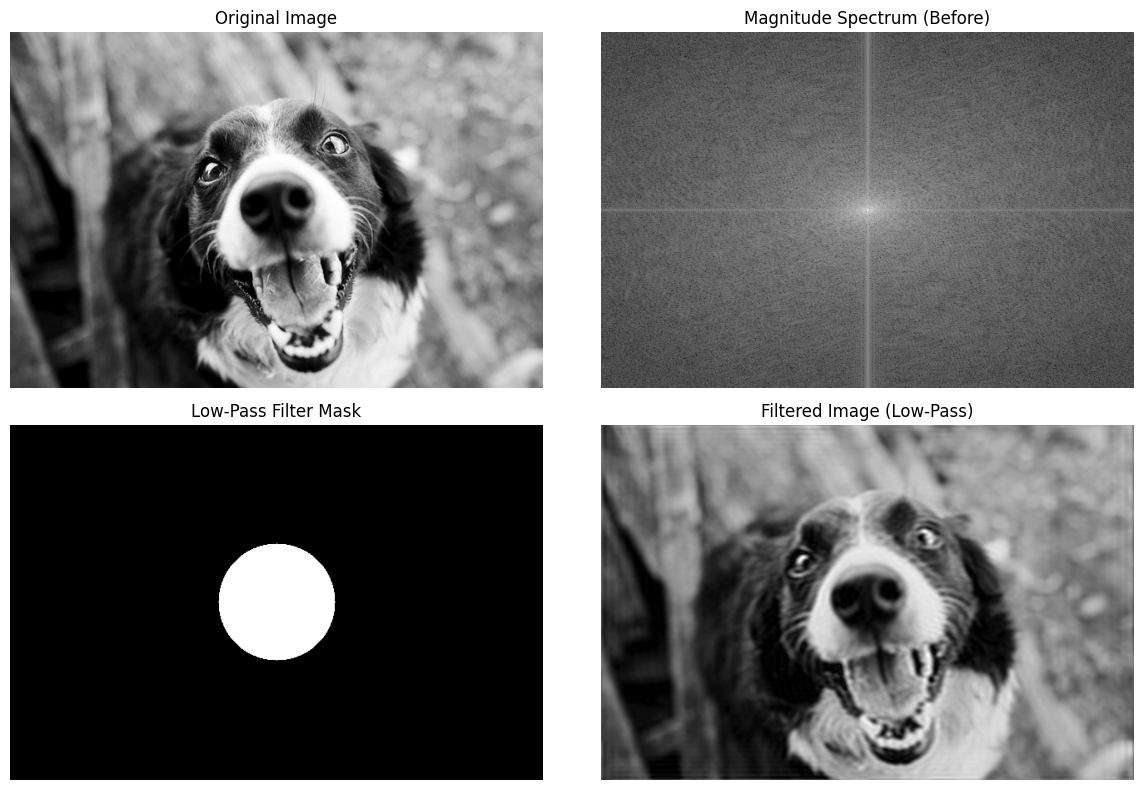

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/dogo.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found! Please check the path.")
else:
    # Compute the Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Create a circular low-pass filter mask
    radius = 70  # Radius of the low-pass filter
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)  # Circle mask with 1 inside

    # Apply the mask to the shifted Fourier Transform
    f_shift_filtered = f_shift * mask

    # Inverse Fourier Transform to get the filtered image
    f_ishift = np.fft.ifftshift(f_shift_filtered)  # Shift back
    filtered_image = np.fft.ifft2(f_ishift)  # Inverse Fourier Transform
    filtered_image = np.abs(filtered_image)  # Take the magnitude to get the real part

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Magnitude Spectrum (Before Filtering)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    plt.subplot(2, 2, 2)
    plt.title("Magnitude Spectrum (Before)")
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.axis("off")

    # Mask
    plt.subplot(2, 2, 3)
    plt.title("Low-Pass Filter Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

    # Filtered Image
    plt.subplot(2, 2, 4)
    plt.title("Filtered Image (Low-Pass)")
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


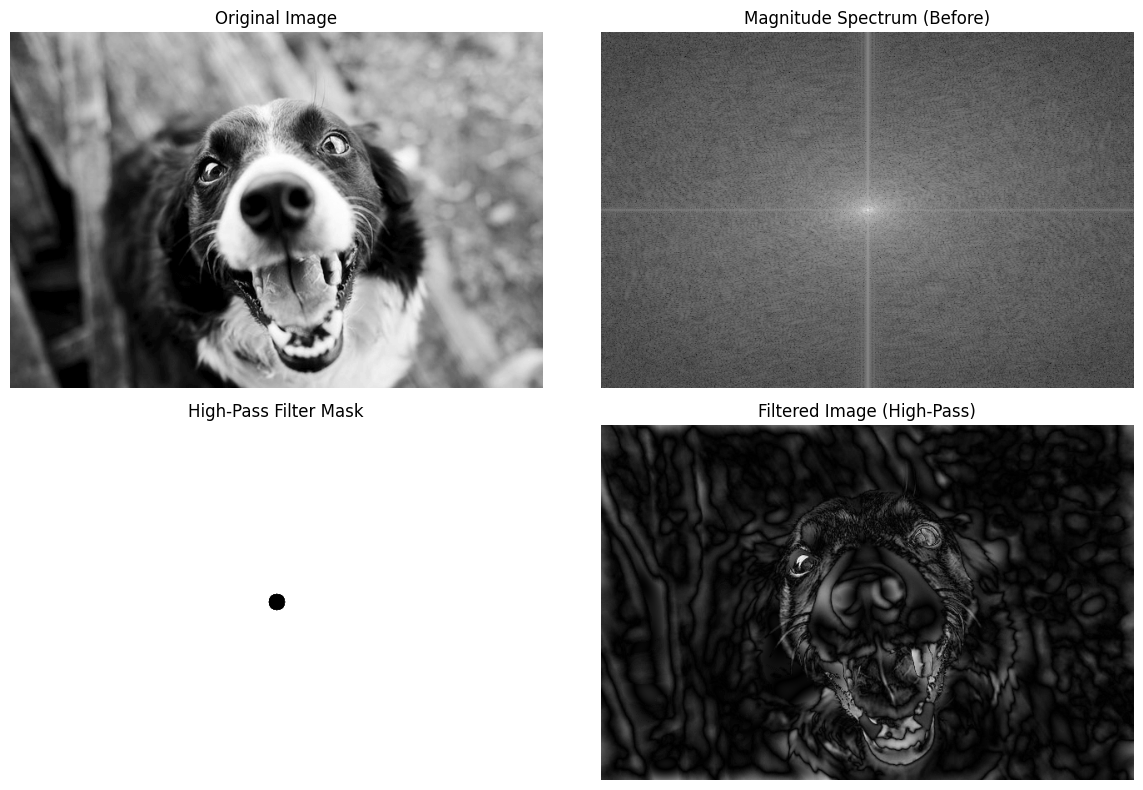

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/dogo.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found! Please check the path.")
else:
    # Compute the Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Create a circular high-pass filter mask
    radius = 10  # Radius of the high-pass filter
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)  # Circle mask with 0 inside

    # Apply the mask to the shifted Fourier Transform
    f_shift_filtered = f_shift * mask

    # Inverse Fourier Transform to get the filtered image
    f_ishift = np.fft.ifftshift(f_shift_filtered)  # Shift back
    filtered_image = np.fft.ifft2(f_ishift)  # Inverse Fourier Transform
    filtered_image = np.abs(filtered_image)  # Take the magnitude to get the real part

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Magnitude Spectrum (Before Filtering)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    plt.subplot(2, 2, 2)
    plt.title("Magnitude Spectrum (Before)")
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.axis("off")

    # Mask
    plt.subplot(2, 2, 3)
    plt.title("High-Pass Filter Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

    # Filtered Image
    plt.subplot(2, 2, 4)
    plt.title("Filtered Image (High-Pass)")
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


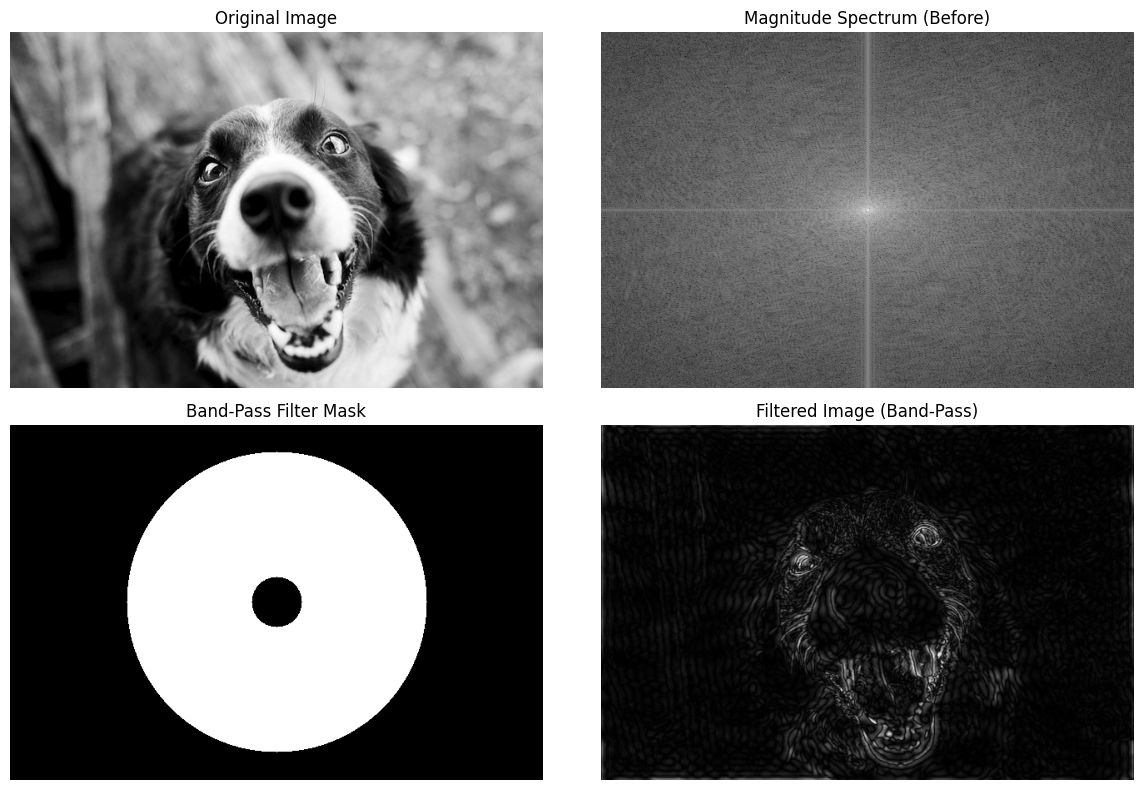

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/dogo.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found! Please check the path.")
else:
    # Compute the Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # Create a band-pass filter mask
    inner_radius = 30  # Inner radius of the band-pass filter (low cutoff)
    outer_radius = 180  # Outer radius of the band-pass filter (high cutoff)

    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), outer_radius, 1, thickness=-1)  # Outer circle (high-pass)
    cv2.circle(mask, (ccol, crow), inner_radius, 0, thickness=-1)  # Inner circle (low-pass)

    # Apply the mask to the shifted Fourier Transform
    f_shift_filtered = f_shift * mask

    # Inverse Fourier Transform to get the filtered image
    f_ishift = np.fft.ifftshift(f_shift_filtered)  # Shift back
    filtered_image = np.fft.ifft2(f_ishift)  # Inverse Fourier Transform
    filtered_image = np.abs(filtered_image)  # Take the magnitude to get the real part

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Magnitude Spectrum (Before Filtering)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
    plt.subplot(2, 2, 2)
    plt.title("Magnitude Spectrum (Before)")
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.axis("off")

    # Mask
    plt.subplot(2, 2, 3)
    plt.title("Band-Pass Filter Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

    # Filtered Image
    plt.subplot(2, 2, 4)
    plt.title("Filtered Image (Band-Pass)")
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


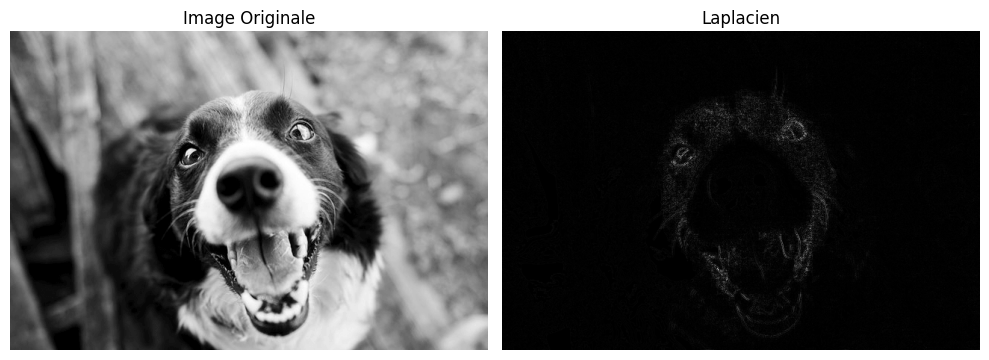

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread("/content/dogo.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found! Please check the path.")
else:
    # Appliquer le filtre Laplacien
    laplacian = cv2.Laplacian(image, cv2.CV_64F)  # CV_64F pour éviter les débordements
    laplacian = np.abs(laplacian)  # Convertir en valeurs absolues

    # Normaliser pour une meilleure visualisation
    laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Afficher les résultats
    plt.figure(figsize=(10, 5))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.title("Image Originale")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Laplacien
    plt.subplot(1, 2, 2)
    plt.title("Laplacien")
    plt.imshow(laplacian_normalized, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


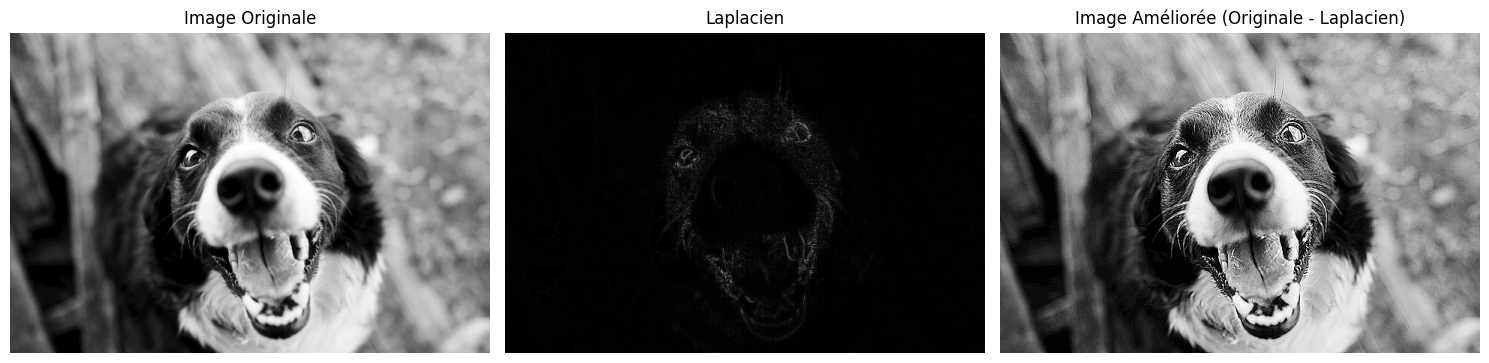

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread("/content/dogo.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Image not found! Please check the path.")
else:
    # Appliquer le filtre Laplacien
    laplacian = cv2.Laplacian(image, cv2.CV_64F)  # CV_64F pour calculer avec précision

    # Convertir l'image originale en float64 pour correspondre au type du Laplacien
    image_float64 = image.astype(np.float64)

    # Soustraire le Laplacien de l'image originale
    enhanced_image = image_float64 - laplacian

    # Clip pour limiter les valeurs dans la plage [0, 255] et conversion en uint8
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)

    # Afficher les résultats
    plt.figure(figsize=(15, 5))

    # Image originale
    plt.subplot(1, 3, 1)
    plt.title("Image Originale")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Laplacien
    plt.subplot(1, 3, 2)
    plt.title("Laplacien")
    plt.imshow(np.abs(laplacian), cmap="gray")
    plt.axis("off")

    # Image améliorée
    plt.subplot(1, 3, 3)
    plt.title("Image Améliorée (Originale - Laplacien)")
    plt.imshow(enhanced_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
